In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append('/home/jeff/projects/fastai')

In [4]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
import torch, torchvision, torchtext
from torch import nn, cuda, backends, FloatTensor, LongTensor, optim
import torch.nn.functional as F
import pandas as pd

In [7]:
img_dir = '/home/jeff/notebooks/kaggle/dogbreed/train/'
img_test_dir = '/home/jeff/notebooks/kaggle/dogbreed/test/'
path = '/home/jeff/notebooks/kaggle/dogbreed/pytorch/'
csv_fname = '/home/jeff/notebooks/kaggle/dogbreed/labels.csv'

In [8]:
df = pd.read_csv(csv_fname)

In [9]:
val_idxs = get_cv_idxs(df.shape[0])

In [37]:
# use val_idxs = [0] when ready to submit preds to kaggle
val_idxs=[0]
# use when testing before submitting to kaggle
val_idxs = get_cv_idxs(df.shape[0])

In [38]:
sz=400

In [39]:
tfms = tfms_from_model(inceptionresnet_2, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [40]:
data = ImageClassifierData.from_csv(path, img_dir, csv_fname, bs=64, tfms=tfms,
                                    val_idxs=val_idxs, suffix='.jpg', 
                                    test_name=img_test_dir, continuous=False, 
                                    skip_header=True, num_workers=8)

In [41]:
learn_inceptionresnet_2 = ConvLearner.pretrained(inceptionresnet_2, data, precompute=False)

In [42]:
learn_inceptionresnet_2.lr_find()

A Jupyter Widget

  4%|▍         | 7/160 [00:06<02:18,  1.11it/s, loss=5.56]


KeyboardInterrupt: 

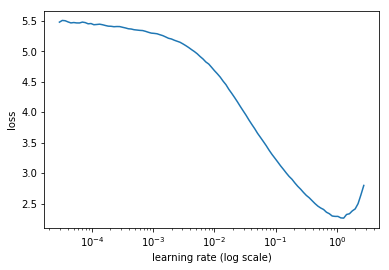

In [15]:
learn_inceptionresnet_2.sched.plot()

In [ ]:
learn_inceptionresnet_2.fit(.1,3)

A Jupyter Widget


 80%|████████  | 128/160 [01:27<00:21,  1.46it/s, loss=0.616]


100%|██████████| 160/160 [01:48<00:00,  1.48it/s, loss=0.544]
                                                             [ 0.       0.5439   0.00056  1.     ]

 59%|█████▉    | 94/160 [01:07<00:47,  1.39it/s, loss=0.431]


100%|██████████| 160/160 [01:48<00:00,  1.48it/s, loss=0.385]
                                                             [ 1.       0.38477  0.0001   1.     ]

 38%|███▊      | 60/160 [00:44<01:13,  1.36it/s, loss=0.345]


100%|██████████| 160/160 [01:48<00:00,  1.48it/s, loss=0.343]
                                                             [ 2.       0.34339  0.00011  1.     ]



In [17]:
learn_inceptionresnet_2.lr_find()

A Jupyter Widget

 90%|████████▉ | 115/128 [01:17<00:08,  1.48it/s, loss=0.562]

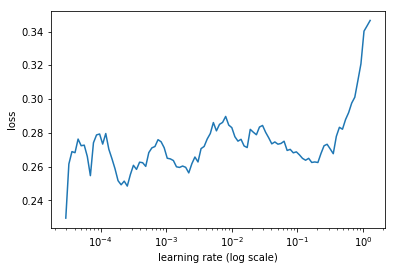

In [18]:
learn_inceptionresnet_2.sched.plot()

In [ ]:
learn_inceptionresnet_2.fit(.05,3,cycle_len=1)

A Jupyter Widget


 79%|███████▉  | 127/160 [01:28<00:22,  1.44it/s, loss=0.262]


100%|██████████| 160/160 [01:48<00:00,  1.48it/s, loss=0.252]
                                                             [ 0.       0.25242  0.00004  1.     ]

 58%|█████▊    | 93/160 [01:07<00:48,  1.39it/s, loss=0.226]


100%|██████████| 160/160 [01:49<00:00,  1.46it/s, loss=0.225]
                                                             [ 1.       0.22478  0.00003  1.     ]

  1%|          | 1/160 [00:01<05:14,  1.98s/it, loss=0.224]

In [ ]:
learn_inceptionresnet_2.fit(.05,3,cycle_len=1,cycle_mult=2)


100%|██████████| 160/160 [01:48<00:00,  1.47it/s, loss=0.2]
                                                           [ 0.       0.19986  0.00005  1.     ]

 42%|████▏     | 67/160 [00:49<01:09,  1.35it/s, loss=0.196]


 51%|█████     | 81/160 [00:59<00:57,  1.37it/s, loss=0.194]

 96%|█████████▋| 154/160 [01:45<00:04,  1.46it/s, loss=0.191]


100%|██████████| 160/160 [01:48<00:00,  1.47it/s, loss=0.196]
                                                             [ 3.       0.19625  0.00006  1.     ]

 75%|███████▌  | 120/160 [01:23<00:27,  1.43it/s, loss=0.179]


100%|██████████| 160/160 [01:48<00:00,  1.47it/s, loss=0.192]
                                                             [ 4.       0.19203  0.00004  1.     ]

 54%|█████▍    | 87/160 [01:02<00:52,  1.38it/s, loss=0.18]


100%|██████████| 160/160 [01:48<00:00,  1.47it/s, loss=0.164]
                                                             [ 5.       0.16351  0.00008  1.     ]

 33%|███▎      | 53/160 [00:40<01:21,  1.32it/s, loss=0.153]


100%|██████████| 160/160 [01:50<00:00,  1.45it/s, loss=0.168]
                                                             [ 6.       0.16757  0.00007  1.     ]



In [53]:
learn_inceptionresnet_2.save('learn_inceptionresnet_2')

In [ ]:
learn_inception_4 = ConvLearner.pretrained(inception_4, data, precompute=False)

In [27]:
learn_inception_4.lr_find()

A Jupyter Widget

 95%|█████████▌| 122/128 [01:08<00:03,  1.78it/s, loss=10.5]

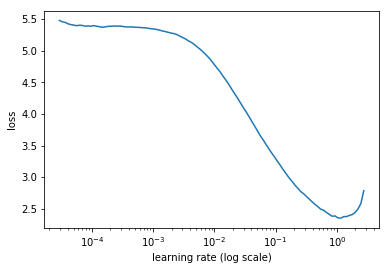

In [28]:
learn_inception_4.sched.plot()

In [ ]:
learn_inception_4.fit(.1,3)

A Jupyter Widget


 80%|████████  | 128/160 [01:14<00:18,  1.73it/s, loss=0.595]


100%|██████████| 160/160 [01:29<00:00,  1.78it/s, loss=0.547]
                                                             [ 0.       0.5468   0.00149  1.     ]

 59%|█████▉    | 94/160 [00:56<00:39,  1.65it/s, loss=0.372]


100%|██████████| 160/160 [01:30<00:00,  1.76it/s, loss=0.37]
                                                            [ 1.       0.37035  0.00022  1.     ]

 38%|███▊      | 60/160 [00:36<01:01,  1.64it/s, loss=0.31]


100%|██████████| 160/160 [01:31<00:00,  1.76it/s, loss=0.324]
                                                             [ 2.       0.32423  0.00009  1.     ]



In [ ]:
learn_inception_4.lr_find()

A Jupyter Widget


 79%|███████▉  | 127/160 [01:13<00:19,  1.73it/s, loss=0.275]


 91%|█████████ | 145/160 [01:22<00:08,  1.76it/s, loss=0.837]
                                                             

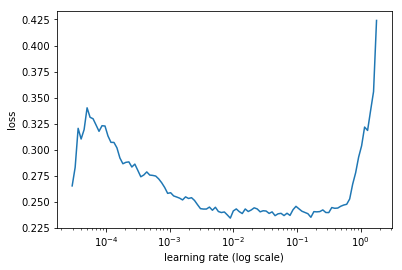

In [32]:
learn_inception_4.sched.plot()

In [ ]:
learn_inception_4.fit(.01,3,cycle_len=1)

A Jupyter Widget


  0%|          | 0/160 [00:00<?, ?it/s]


Exception in thread Thread-42:
Traceback (most recent call last):
  File "/home/jeff/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/jeff/anaconda3/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/jeff/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




 79%|███████▉  | 127/160 [01:15<00:19,  1.69it/s, loss=0.242]


100%|██████████| 160/160 [01:30<00:00,  1.76it/s, loss=0.236]
                                                             [ 0.       0.23573  0.0001   1.     ]

 59%|█████▉    | 94/160 [00:56<00:39,  1.67it/s, loss=0.229]


100%|██████████| 160/160 [01:30<00:00,  1.76it/s, loss=0.215]
                                                             [ 1.       0.21533  0.00008  1.     ]

 38%|███▊      | 60/160 [00:36<01:00,  1.65it/s, loss=0.22]


100%|██████████| 160/160 [01:29<00:00,  1.79it/s, loss=0.204]
                                                             [ 2.       0.2042   0.00016  1.     ]



In [34]:
learn_inception_4.save('learn_inception_4')

In [ ]:
learn_inception_4.fit(.01,3,cycle_len=1,cycle_mult=2)

A Jupyter Widget


 79%|███████▉  | 127/160 [01:14<00:19,  1.70it/s, loss=0.197]


100%|██████████| 160/160 [01:30<00:00,  1.76it/s, loss=0.193]
                                                             [ 0.       0.19281  0.00012  1.     ]

 58%|█████▊    | 93/160 [00:56<00:40,  1.65it/s, loss=0.188]


100%|██████████| 160/160 [01:30<00:00,  1.76it/s, loss=0.202]
                                                             [ 1.       0.20166  0.00022  1.     ]

 37%|███▋      | 59/160 [00:36<01:02,  1.63it/s, loss=0.194]


100%|██████████| 160/160 [01:29<00:00,  1.79it/s, loss=0.189]
                                                             [ 2.       0.1889   0.00018  1.     ]

 16%|█▌        | 25/160 [00:15<01:24,  1.59it/s, loss=0.183]


 95%|█████████▌| 152/160 [01:26<00:04,  1.76it/s, loss=0.186]


100%|██████████| 160/160 [01:29<00:00,  1.78it/s, loss=0.185]
                                                             [ 3.       0.18504  0.00015  1.     ]

 74%|███████▍  | 119/160 [01:10<00:24,  1.70it/s, loss=0.17]


100%|██████████| 160/160 [01:31<00:00,  1.75it/s, loss=0.18]
                                                            [ 4.       0.18018  0.00011  1.     ]

 53%|█████▎    | 85/160 [00:50<00:44,  1.67it/s, loss=0.18] 


100%|██████████| 160/160 [01:31<00:00,  1.76it/s, loss=0.189]
                                                             [ 5.       0.18854  0.00015  1.     ]

 32%|███▏      | 51/160 [00:31<01:06,  1.64it/s, loss=0.185]


100%|██████████| 160/160 [01:29<00:00,  1.78it/s, loss=0.184]
                                                             [ 6.       0.18403  0.00016  1.     ]



In [52]:
learn_inception_4.save('learn_inception_4')

In [51]:
learn_inception_4

In [54]:
log_preds_inception,y = learn_inception_4.TTA(is_test=True)


100%|██████████| 4/4 [05:09<00:00, 77.37s/it]
                                             

In [55]:
log_preds_resnet,y = learn_inceptionresnet_2.TTA(is_test=True)


100%|██████████| 4/4 [06:31<00:00, 97.96s/it]
                                             

In [56]:
log_preds_avg = np.mean(
    np.stack(
        (log_preds_inception,
        log_preds_resnet,
        )
    ),
    axis=0
)

In [57]:
preds = np.exp(log_preds_avg)

In [58]:
data.test_dl.dataset.fnames[0][8:-4],data.test_dl.dataset.fnames[0]

('07eee2f7339d2ed306bfa6d032b1eee2',
 '../test/07eee2f7339d2ed306bfa6d032b1eee2.jpg')

In [59]:
df2 = pd.read_csv('./sample_submission.csv')

In [60]:
df2.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [61]:
for i in range(120):
    df2[data.classes[i]] = preds[:,i]

In [62]:
df2['id'] = [file[8:-4] for file in data.test_dl.dataset.fnames]

In [63]:
df2.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,07eee2f7339d2ed306bfa6d032b1eee2,4.488628e-07,0.000038,9.870253e-01,0.000003,1.310967e-06,9.262353e-07,1.772621e-06,1.826939e-06,3.939723e-05,...,1.298268e-06,7.262883e-07,1.790009e-06,1.447439e-06,3.483721e-06,3.094885e-05,2.053630e-06,8.879500e-06,0.000004,1.946231e-07
1,c717c585c11e9ea10f4096273c21b49a,4.810573e-07,0.000002,1.029644e-07,0.000003,1.961991e-07,3.252823e-06,1.666413e-06,3.436841e-07,1.640494e-07,...,7.700830e-08,2.493951e-07,1.666167e-07,2.753910e-07,2.277472e-07,3.844537e-07,6.878206e-08,6.045653e-07,0.000009,2.785914e-08
2,ec81d166f296c1809d8be99cdabb5904,2.372509e-07,0.000003,9.645699e-07,0.000004,4.799900e-07,1.367283e-07,9.316286e-07,7.948908e-07,1.164986e-06,...,8.352782e-08,8.543623e-08,2.229881e-06,6.925773e-07,4.721186e-06,2.429040e-07,1.790279e-06,6.127959e-07,0.000002,9.219606e-08
3,d2a440580e48f9004697bd6c13026a25,5.870289e-06,0.000003,5.896464e-06,0.000288,3.504000e-06,2.912110e-06,6.572795e-06,4.303767e-06,1.190194e-05,...,1.017706e-05,4.966879e-06,1.362824e-06,2.695710e-06,1.417738e-05,3.932641e-06,1.472591e-05,9.597865e-07,0.000660,1.282057e-05
4,85505d3654e57f79c2044bd69fce95bd,2.240366e-06,0.000001,2.105477e-06,0.000030,1.492312e-06,5.722193e-06,9.772295e-06,1.535521e-06,6.482669e-07,...,1.075383e-06,3.379472e-05,8.394727e-07,1.398616e-05,3.915559e-07,3.628928e-06,1.374753e-06,1.089470e-06,0.995234,1.278759e-06


In [64]:
df2.to_csv('pred8.csv', index=None)

In [65]:
df2.shape

(10357, 121)